In [910]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
sns.set()
import random
from PIL import Image
import time
from datetime import datetime

In [911]:
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [912]:
import json
annotations = json.load(open('images/Annotations.json'))

In [913]:
annotations

{'version': '1.0',
 'type': 'classification',
 'labels': ['dog', 'cat'],
 'annotations': {'4a06984e-71da-4e04-915c-302e7bdacab8.jpg': [{'label': 'cat',
    'id': '0b589cd9-b6d0-4b13-8f2e-60ab6064d636'}],
  '1ec364d0-3d92-4aa6-b6bc-82dc4beea833.jpg': [{'label': 'dog',
    'id': 'aac6742f-aea4-4ee2-9ffb-cbdcf7cd0728'}],
  'a96db40b-bf77-4f4e-8285-4e4395fd7a76.jpg': [{'label': 'dog',
    'id': '3886c389-879b-4131-964e-129fa5b674fe'}],
  '3ea1ea09-a1f9-46d4-913b-f6eaf28043d5.jpg': [{'label': 'dog',
    'id': '1ccb7a51-5062-4b39-b719-5bc45a6b802d'}],
  'trial.jpg': [{'label': 'dog', 'id': 'trial'}],
  'c804288a-4419-4c8a-b5c9-d36ab1fddf05.jpg': [{'label': 'cat',
    'id': 'fdd8d69f-7c44-48f4-8d26-dacca2db459b'}],
  'f0570d50-b896-44a3-ab7f-7bef026886a6.jpg': [{'label': 'dog',
    'id': 'edaa0b8e-a506-4ece-9fc2-8c9e0f5a7a70'}],
  '2f1cb52c-bd6c-48cf-927e-4c1768fec84c.jpg': [{'label': 'cat',
    'id': '78abb459-5514-4874-88f5-2cfe6d4027c2'}],
  '17ad1a20-6ede-49d4-a0dc-a3db2e8e4bcc.jpg': [{'l

In [914]:
first_five = {k: annotations["annotations"][k] for k in list(annotations["annotations"])[:5]}
first_five

{'4a06984e-71da-4e04-915c-302e7bdacab8.jpg': [{'label': 'cat',
   'id': '0b589cd9-b6d0-4b13-8f2e-60ab6064d636'}],
 '1ec364d0-3d92-4aa6-b6bc-82dc4beea833.jpg': [{'label': 'dog',
   'id': 'aac6742f-aea4-4ee2-9ffb-cbdcf7cd0728'}],
 'a96db40b-bf77-4f4e-8285-4e4395fd7a76.jpg': [{'label': 'dog',
   'id': '3886c389-879b-4131-964e-129fa5b674fe'}],
 '3ea1ea09-a1f9-46d4-913b-f6eaf28043d5.jpg': [{'label': 'dog',
   'id': '1ccb7a51-5062-4b39-b719-5bc45a6b802d'}],
 'trial.jpg': [{'label': 'dog', 'id': 'trial'}]}

In [915]:
random_image = 'images/' + random.choice(list(annotations['annotations'].keys()))

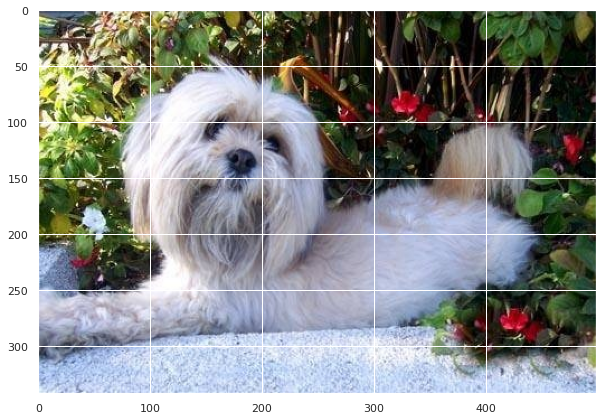

In [916]:
sample_image = cv2.imread(random_image)
## Convert to RGB
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)
## Now plot the image
plt.figure(figsize=(10,10))
plt.imshow(image, cmap = "gray")
plt.show()

In [917]:
image_paths = list(paths.list_images('images'))
random_imag = Image.open(random_image)

In [918]:
train_images = []
train_labels = []
class_object = annotations['labels']
class_object

['dog', 'cat']

In [919]:
for (i, image_path) in enumerate(image_paths):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    label = class_object.index(annotations["annotations"][image_path[7:]][0]['label'])
    tmp_label = annotations["annotations"][image_path[7:]][0]['label']
    image = cv2.resize(image, (120, 120))
    pixels = image.flatten()
    train_images.append(pixels)
    train_labels.append(label)

In [920]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)
trial = cv2.imread('trial.jpg')
trial = cv2.cvtColor(trial, cv2.COLOR_BGR2GRAY)
trial = cv2.resize(trial, (120, 120))
test_image = np.array(trial.flatten()).astype('float32')


In [921]:
train_images[0].shape

(14400,)

In [922]:
test_image = test_image.reshape(1,14400)
test_image


array([[ 49.,  39.,  44., ..., 133., 127., 134.]], dtype=float32)

In [923]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape((train_labels.size,1))

In [924]:
train_samples, test_samples, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=365)

In [925]:
start_datetime = datetime.now()
knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_labels)
k_result = []
for k in range(1, 6):
    ret, result, neighbours, dist  = knn.findNearest(test_samples, k=k)
    k_result.append(result)
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)
end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime-start_datetime))


Training Duration: 0:00:00.088975


In [926]:
## create an empty list to save accuracy and the cofusion matrix
accuracy_res = []
con_matrix = []
k_values = [1, 2, 3, 4, 5]
## we will use a loop because we have multiple value of k
for k_res in k_result:
    label_names = [0, 1]
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    con_matrix.append(cmx)
    ## get values for when we predict accurately
    matches = k_res==test_labels
    correct = np.count_nonzero(matches)
    ## calculate accuracy
    accuracy = correct*100.0/result.size
    accuracy_res.append(accuracy)
## stor accuracy for later when we create the graph
res_accuracy = {k_values[i]: accuracy_res[i] for i in range(len(k_values))}
list_res = sorted(res_accuracy.items())

In [927]:
list_res

[(1, 57.5), (2, 45.0), (3, 47.5), (4, 45.0), (5, 47.5)]

In [928]:
k_best = max(list_res,key=lambda item:item[1])[0]
k_best

1

In [929]:
knn.save('knn_samples.yml')

In [930]:
ret, result, neighbours, dist  = knn.findNearest(test_image, k=5)
result

array([[0.]], dtype=float32)